# Goals
Menemukan harga rumah yang berada dibawah harga pasar untuk melakukan investasi

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('price.csv')
df

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price
0,1,9796.0,5250.0,10703.0,1659.0,1961.0,Open,CAT B,530,6649000
1,2,8294.0,8186.0,12694.0,1461.0,1752.0,Not Provided,CAT B,210,3982000
2,3,11001.0,14399.0,16991.0,1340.0,1609.0,Not Provided,CAT A,720,5401000
3,4,8301.0,11188.0,12289.0,1451.0,1748.0,Covered,CAT B,620,5373000
4,5,10510.0,12629.0,13921.0,1770.0,2111.0,Not Provided,CAT B,450,4662000
...,...,...,...,...,...,...,...,...,...,...
931,932,9297.0,12537.0,14418.0,1174.0,1429.0,Covered,CAT C,1110,5434000
932,933,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000
933,934,9205.0,10418.0,14496.0,1118.0,1337.0,Open,CAT A,560,7227000
934,935,10915.0,17486.0,15964.0,1549.0,1851.0,Not Provided,CAT C,1220,7062000


# Asumsi
Rumah yang cocok untuk diinvestasi yaitu:
- Rumah yang dekat dengan taxi, market, dan hospital
- Memiliki luas diatas rata-rata
- Memiliki carpet area diatas rata-rata
- Memiliki lahan parkir (baik open/covered)
- Harga dibawah rata-rata

Hal ini dikarenakan seluruh asumsi menunjukkan bahwa rumah tersebut memiliki nilai lebih dibanding rumah lainnya, sehingga layak untuk diinvestasikan

# Preprocess

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Observation    936 non-null    int64  
 1   Dist_Taxi      923 non-null    float64
 2   Dist_Market    923 non-null    float64
 3   Dist_Hospital  935 non-null    float64
 4   Carpet         928 non-null    float64
 5   Builtup        921 non-null    float64
 6   Parking        936 non-null    object 
 7   City_Category  936 non-null    object 
 8   Rainfall       936 non-null    int64  
 9   House_Price    936 non-null    int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 73.2+ KB


## Check for duplicated row

In [4]:
df.duplicated().value_counts()

False    936
Name: count, dtype: int64

## Handle missing value

In [5]:
df.isnull().sum()

Observation       0
Dist_Taxi        13
Dist_Market      13
Dist_Hospital     1
Carpet            8
Builtup          15
Parking           0
City_Category     0
Rainfall          0
House_Price       0
dtype: int64

In [6]:
df_preprocessed = df.copy()

for col in df_preprocessed.columns:
    if df_preprocessed[col].isnull().any():
        modus = df_preprocessed[col].mode()[0]
        df_preprocessed[col].fillna(modus, inplace=True)

df_preprocessed.isnull().sum()

C:\Users\Fajar Ramadhan\AppData\Local\Temp\ipykernel_19252\1624152324.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_preprocessed[col].fillna(modus, inplace=True)


Observation      0
Dist_Taxi        0
Dist_Market      0
Dist_Hospital    0
Carpet           0
Builtup          0
Parking          0
City_Category    0
Rainfall         0
House_Price      0
dtype: int64

## Handle outliers

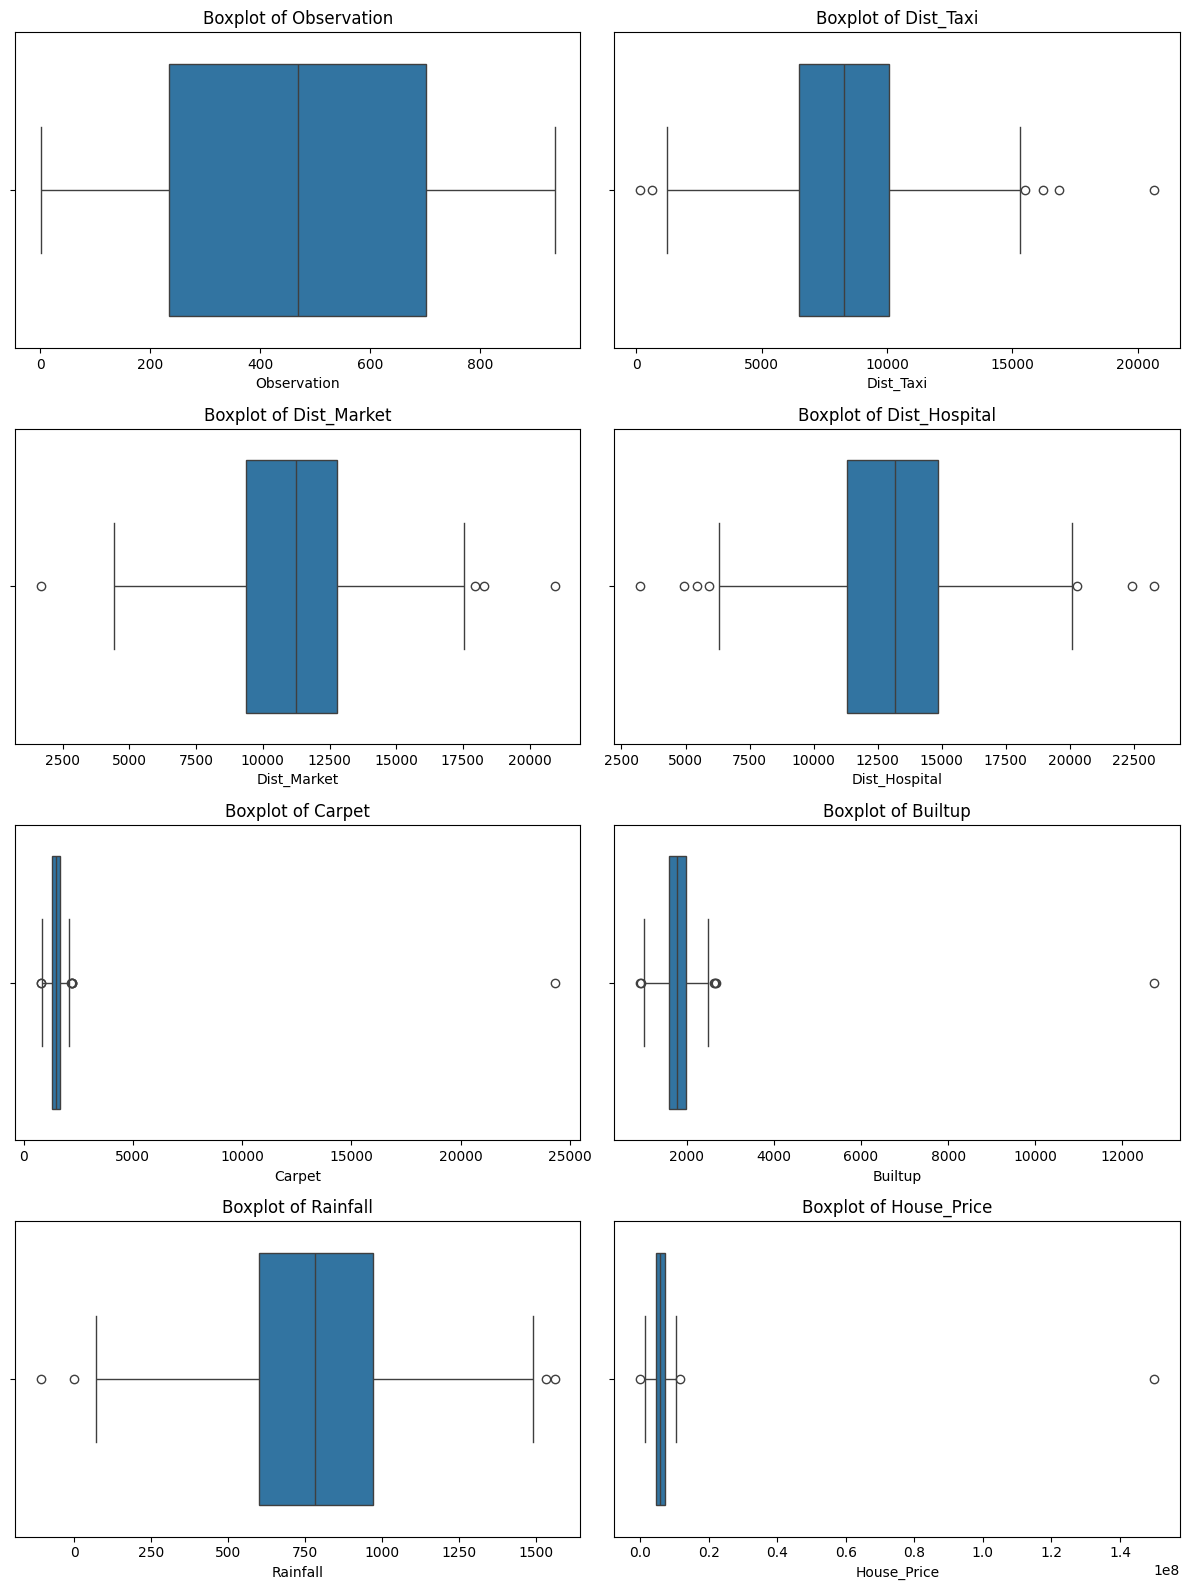

In [7]:
numerical_features = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns.tolist() # Memilih dataset bertipe 'float64'

num_features = len(numerical_features) # Menghitung banyak fitur yang ingin divisualisasikan
fig, axes = plt.subplots(4, 2, figsize=(12, 2 * num_features)) # Mendapatkan ukuran untuk seluruh gambar serta banyak gambar yang ingin divisualisasi

axes = axes.flatten() # Mengubah objek 2d menjadi 1d yang menyatakan banyaknya jumlah fitur yang divisualisasi

# Membuat perulangan agar semua fitur/kolom divisualisasikan
for i, feature in enumerate(numerical_features):
    if num_features == 1:
        ax = axes # Jika hanya ada satu fitur yang divisualisasi, maka rangkaian gambar langsung dibentuk
    else:
        ax = axes[i] # Jika terdapat banyak visualiasi dalam satu bingkai/rangkain, maka akan disatukan dulu

    sns.boxplot(x=feature, data=df_preprocessed, ax=ax) # Membuat kdeplot
    ax.set_title(f'Boxplot of {feature}') # Mendeklarasi judul
    ax.set_xlabel(feature) # Mendeklarasi petunjuk pada bagian bawah

plt.tight_layout() # Melakukan penyesuaian jika visualiasi lebih dari ukuran
plt.show() # Menampilkan visualisasi

In [ ]:
numerical_features = df_preprocessed.select_dtypes(include=['float64', 'int64']).columns.tolist()

Q1 = df_preprocessed[numerical_features].quantile(0.25)
Q3 = df_preprocessed[numerical_features].quantile(0.75)
IQR = Q3 - Q1

df_preprocessed = df_preprocessed[~((df_preprocessed["House_Price"] > (Q3 + 1.5 * IQR))).any(axis=1)]

KeyError: 'House_price'

Penghapusan outliers hanya dilakukan pada outliers yang berada pada nilai tinggi saja agar tidak menghapus data rumah dengan harga rendah

# Feature engineering & Visualization

In [ ]:
df_final = df_preprocessed.copy()

## Feature Engineering

### Menandai rumah yang dekat dengan taxi

In [ ]:
Q1 = df['Dist_Taxi'].quantile(0.25)

df_final['is_near_taxi'] = (df['Dist_Taxi'] <= Q1).astype(int)

### Menandai rumah yang dekat dengan market

In [ ]:
Q2 = df['Dist_Market'].quantile(0.25)

df_final['is_near_market'] = (df['Dist_Market'] <= Q2).astype(int)

### Menandai rumah yang dekat dengan hospital

In [ ]:
Q1 = df['Dist_Hospital'].quantile(0.25)

df_final['is_near_hospital'] = (df['Dist_Hospital'] <= Q1).astype(int)

### Menandai rumah yang memiliki luas yang bisa ditempati diatas rata-rata

In [ ]:
mean_carpet = df['Carpet'].mean()

df_final['is_high_carpet'] = (df['Carpet'] >= mean_carpet).astype(int)

### Menandai rumah yang memiliki lahan parkir

In [ ]:
df_final['existing_parking'] = ((df['Parking'] == 'Covered') | (df['Parking'] == 'Open')).astype(int)

### Menandai rumah yang memiliki harga dibawah rata-rata

In [ ]:
mean_price = df['House_Price'].mean()

df_final['is_under_price'] = (df['House_Price'] <= mean_price).astype(int)

## Visualization

In [ ]:
df_invest = df_final[
    (df_final['is_near_taxi'] == 1) &
    (df_final['is_near_market'] == 1) &
    (df_final['is_near_hospital'] == 1) &
    (df_final['is_high_carpet'] == 1) &
    (df_final['existing_parking'] == 1) &
    (df_final['is_under_price'] == 1)
]

df_invest

,Observation,Dist_Taxi,Dist_Market,Dist_Hospital,Carpet,Builtup,Parking,City_Category,Rainfall,House_Price,is_near_taxi,is_near_market,is_near_hospital,is_high_carpet,existing_parking,is_under_price
19,20,6209.0,7839.0,10660.0,1837.0,1858.0,Open,CAT B,790,4922000,1,1,1,1,1,1
128,129,1637.0,7315.0,7685.0,1525.0,1835.0,Covered,CAT C,900,3277000,1,1,1,1,1,1
187,188,4917.0,7195.0,9468.0,1704.0,2032.0,Covered,CAT C,590,4830000,1,1,1,1,1,1
228,229,5899.0,7614.0,9374.0,1525.0,1829.0,Covered,CAT A,840,5582000,1,1,1,1,1,1
266,267,5566.0,9162.0,10429.0,1604.0,1925.0,Covered,CAT B,670,5437000,1,1,1,1,1,1
361,362,4846.0,6375.0,9920.0,2004.0,2390.0,Open,CAT B,930,5013000,1,1,1,1,1,1
567,568,2314.0,8933.0,8231.0,1607.0,1909.0,Open,CAT C,460,3903000,1,1,1,1,1,1
590,591,5738.0,8270.0,10242.0,1748.0,2092.0,Open,CAT B,580,4917000,1,1,1,1,1,1
640,641,5761.0,7680.0,10875.0,1529.0,1839.0,Open,CAT B,1000,5059000,1,1,1,1,1,1
738,739,5913.0,7138.0,9401.0,1693.0,2032.0,Open,CAT C,610,4191000,1,1,1,1,1,1


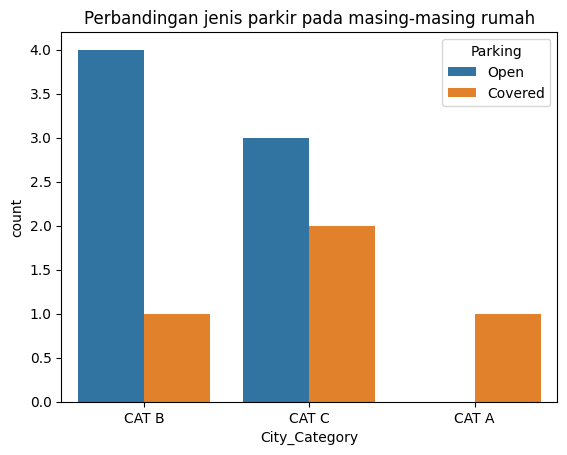

In [ ]:
sns.countplot(data=df_invest, x='City_Category', hue='Parking')
plt.title("Perbandingan jenis parkir pada masing-masing rumah")
plt.show()

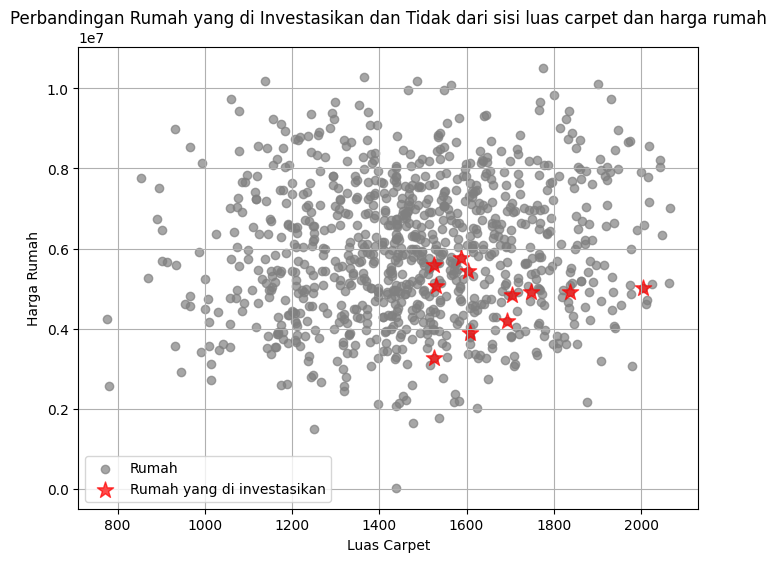

In [ ]:
import matplotlib.pyplot as plt

# Misal masing-masing df punya kolom 'x' dan 'y'
plt.figure(figsize=(8, 6))

# Plot dari df1 dengan marker titik
plt.scatter(df_preprocessed['Carpet'], df_preprocessed['House_Price'], color='grey', label='Rumah', alpha=0.7)

# Plot dari df2 dengan marker bintang
plt.scatter(df_invest['Carpet'], df_invest['House_Price'], color='red', marker='*', s=150, label='Rumah yang di investasikan', alpha=0.7)

# Tambahan: Label dan legend
plt.xlabel('Luas Carpet')
plt.ylabel('Harga Rumah')
plt.title('Perbandingan Rumah yang di Investasikan dan Tidak dari sisi luas carpet dan harga rumah')
plt.legend()
plt.grid(True)
plt.show()


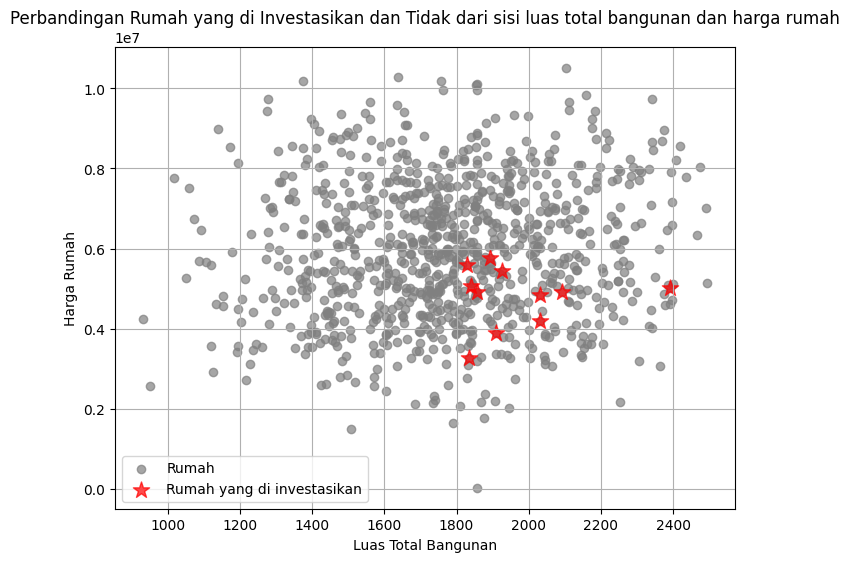

In [ ]:
import matplotlib.pyplot as plt

# Misal masing-masing df punya kolom 'x' dan 'y'
plt.figure(figsize=(8, 6))

# Plot dari df1 dengan marker titik
plt.scatter(df_preprocessed['Builtup'], df_preprocessed['House_Price'], color='grey', label='Rumah', alpha=0.7)

# Plot dari df2 dengan marker bintang
plt.scatter(df_invest['Builtup'], df_invest['House_Price'], color='red', marker='*', s=150, label='Rumah yang di investasikan', alpha=0.7)

# Tambahan: Label dan legend
plt.xlabel('Luas Total Bangunan')
plt.ylabel('Harga Rumah')
plt.title('Perbandingan Rumah yang di Investasikan dan Tidak dari sisi luas total bangunan dan harga rumah')
plt.legend()
plt.grid(True)
plt.show()


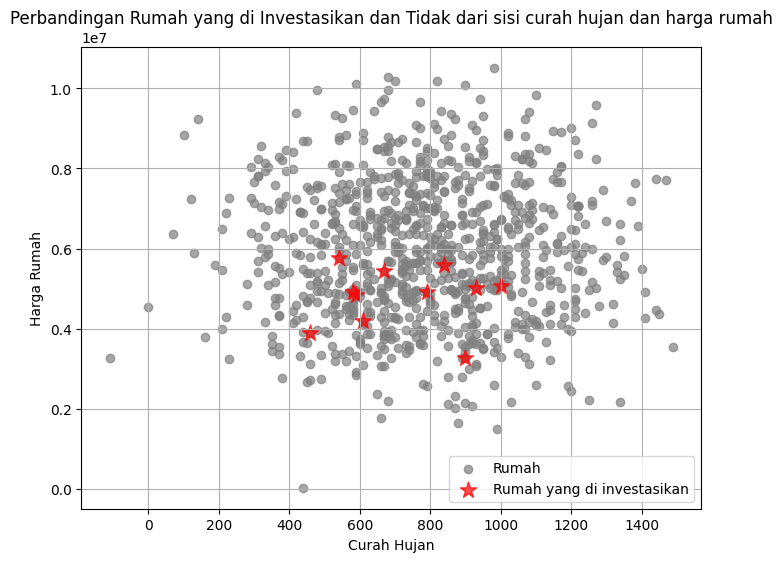

In [ ]:
import matplotlib.pyplot as plt

# Misal masing-masing df punya kolom 'x' dan 'y'
plt.figure(figsize=(8, 6))

# Plot dari df1 dengan marker titik
plt.scatter(df_preprocessed['Rainfall'], df_preprocessed['House_Price'], color='grey', label='Rumah', alpha=0.7)

# Plot dari df2 dengan marker bintang
plt.scatter(df_invest['Rainfall'], df_invest['House_Price'], color='red', marker='*', s=150, label='Rumah yang di investasikan', alpha=0.7)

# Tambahan: Label dan legend
plt.xlabel('Curah Hujan')
plt.ylabel('Harga Rumah')
plt.title('Perbandingan Rumah yang di Investasikan dan Tidak dari sisi curah hujan dan harga rumah')
plt.legend()
plt.grid(True)
plt.show()


# Kesimpulan

Terdapat 11 rumah yang memenuhi seluruh kriteria sebagai rumah yang layak untuk diinvestasikan, berdasarkan asumsi yang dibuat mengenai daya tarik rumah di mata calon pembeli. 